### Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data .

In [42]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv('H:/ExcelR Data Science/datasets_BA/wine.csv')

df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [44]:
#checking the original shape
df.shape

(178, 14)

In [45]:
# checking for null value and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [46]:
# checking unique values of Type col
df['Type'].unique()

array([1, 2, 3], dtype=int64)

In [47]:
# dropping type col
df.drop('Type',axis=1,inplace=True)

In [48]:
#dropping duplicate rows
df.drop_duplicates(keep=False,inplace=True)

In [49]:
df.shape

(178, 13)

In [50]:
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [51]:
# statistical summary
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [52]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
norm=mms.fit_transform(df)
df_norm=pd.DataFrame(norm,columns=df.columns)

In [53]:
df_norm.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [54]:
df_norm.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df1=df_norm.copy()

## Clustering without PCA

## Algorithm used----Hierarchical Clustering

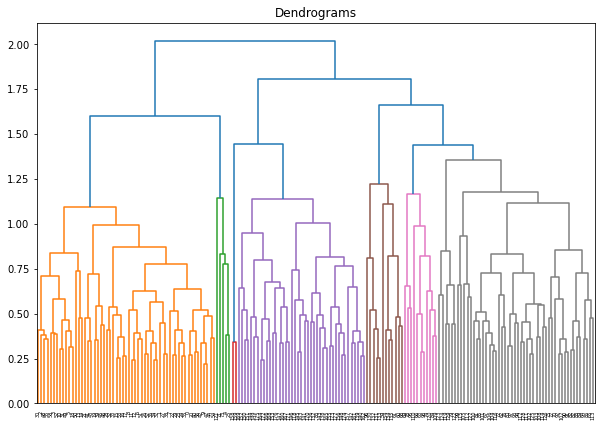

In [56]:
# Drawing the dendrogram

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(df1, method='complete'))

In [57]:
# Creating a loop to iterate through various cluster number and calculate the silhouette score
# Cluster number having highest silhouette score will be chosen to fit the model

from sklearn.metrics import silhouette_score

scores=[]
hc_score=0
hc_cluster=0
i=0

for c in range(3,14):
    
    hc= AgglomerativeClustering(n_clusters=c, affinity = 'euclidean', linkage = 'complete')
    hc_pred = hc.fit_predict(df1)
    score= silhouette_score (df1, hc_pred, metric='euclidean')
    scores.append(score)
    i=i+1
    if (score>=max(scores)):
        hc_score=round(score,3)
        hc_cluster=c
        
        
print("Maximum silhouette score is {} for optimal number of clusters-{}.".format(hc_score,hc_cluster))
print("Number of iterations:",i)


Maximum silhouette score is 0.274 for optimal number of clusters-3.
Number of iterations: 11


In [58]:
# Fitting the data with 3 clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
hc_pred = hc.fit_predict(df1)


In [59]:
hc_df=df1.copy()
hc_df['Clusters']=hc_pred
hc_df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1


In [60]:
# Using groupby function to sort by Clusters
hc_df.groupby(['Clusters']).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Clusters,,,,,,,,,,,,,
0,0.329164,0.232471,0.463922,0.480582,0.268910,0.410439,0.334749,0.440682,0.366017,0.169632,0.443435,0.504641,0.177330
1,0.702419,0.248566,0.595653,0.358746,0.399369,0.646496,0.563870,0.302495,0.469828,0.357178,0.478626,0.696680,0.580404
2,0.575092,0.552900,0.581644,0.564853,0.305865,0.248276,0.093955,0.626591,0.243269,0.531451,0.163925,0.173183,0.246541


+ From above it can be seen that the wine data set has been clustered into 3 different clusters.
+ If we consider the Alcohol column for segmentation analysis we can see that there are three distinct segments-low alcohol content(cluster 0), medium alcohol content(cluster 2) and high alcohol content(cluster 1)

## Algorithm used-----K-Means Clustering

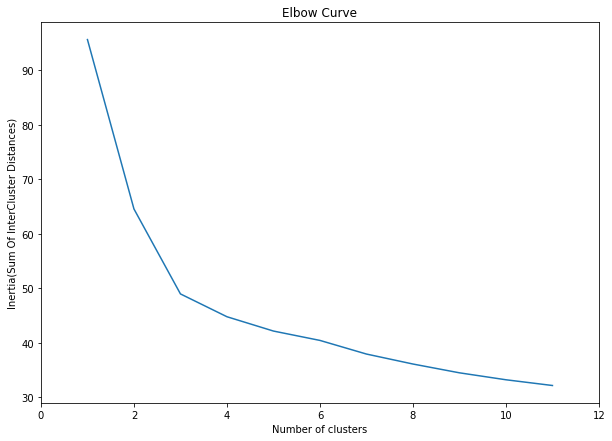

In [61]:
# Finding the optimum number of Clusters using Elbow curve

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,7))    
plt.plot(range(1, 12), wcss)
plt.title('Elbow Curve')
plt.xlim(0,12)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia(Sum Of InterCluster Distances)')
plt.show()

The elbow curve shows that optimum number of clusters lie between 3-6

In [62]:
# creating a loop to iterate through possible optimum no of clusters
# calculating their silhouette scores 

scores=[]
km_score=0
km_cluster=0
i=0
for c in range(2,7):
    km= KMeans(n_clusters=c, random_state=0)
    km_pred = km.fit_predict(df1)
    score= silhouette_score (df1, km_pred, metric='euclidean')
    scores.append(score)
    i=i+1
    if (score>=max(scores)):
        km_score=round(score,3)
        km_cluster=c
        
print("Maximum silhouette score is {} for optimal number of clusters-{}.".format(km_score,km_cluster))
print("Number of iterations:",i)


Maximum silhouette score is 0.301 for optimal number of clusters-3.
Number of iterations: 5


In [63]:
# Fitting with 3 clusters

km= KMeans(n_clusters=3, random_state=0)
km_pred = km.fit_predict(df1)

km_df=df1.copy()
km_df['clusters']=km_pred
km_df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


In [64]:
# using Groupby
km_df.groupby(['clusters']).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clusters,,,,,,,,,,,,,
0,0.705651,0.248429,0.584904,0.344431,0.410727,0.642114,0.554679,0.300340,0.477272,0.355340,0.477809,0.690386,0.593894
1,0.546686,0.484409,0.561596,0.538660,0.315217,0.246743,0.104743,0.614256,0.225435,0.488781,0.188889,0.158527,0.249115
2,0.313367,0.235617,0.473050,0.500245,0.245514,0.448057,0.380082,0.418688,0.397176,0.147787,0.472190,0.584220,0.156375


+ From above it can be seen that the wine data set has been clustered into 3 different clusters.
+ If we consider the Alcohol column for segmentation analysis we can see that there are three distinct segments-high alcohol content(cluster 0), medium alcohol content(cluster 1) and low alcohol content(cluster 2)

## Using PCA for dimensionality reduction followed by Clustering

In [65]:
print("Number of features/columns in dataset is:",df1.shape[1])

Number of features/columns in dataset is: 13


In [66]:
pca = PCA(n_components=13)
pca.fit(df1)


PCA(n_components=13)

In [67]:
# calculating variance and cumulative variance
variance = pca.explained_variance_ratio_

cumulative_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)# calculating cumulative variance
cumulative_var

array([ 40.7,  59.7,  68.3,  75.7,  81.3,  86. ,  89.7,  92.1,  94.4,
        96.7,  98.1,  99.4, 100.2])

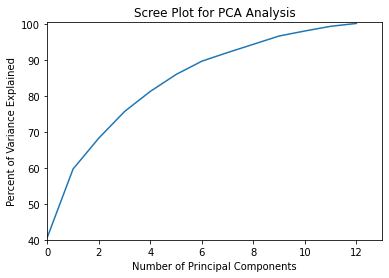

In [68]:
# Sorting and selecting the number of features to use
plt.ylabel('Percent of Variance Explained')
plt.xlabel('Number of Principal Components')
plt.title('Scree Plot for PCA Analysis')
plt.ylim(40,100.5)
plt.xlim(0,13)
plt.style.context('seaborn-whitegrid')

plt.plot(cumulative_var)

From above plot,it can be seen that 3 principal components can explain upto 69% of variance

In [69]:
# Fitting with 3 principal components and transforming
pca = PCA(n_components=3)
pca.fit(df1)
pca_arr= pca.transform(df1)
df_pca = pd.DataFrame(pca_arr,columns=['PC1','PC2','PC3'])
df_pca.head()

,PC1,PC2,PC3
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240


In [70]:
print("original shape:   ", df1.shape)
print("transformed shape:", df_pca.shape)

original shape:    (178, 13)
transformed shape: (178, 3)


## Algorithm used----Hierarchical clustering

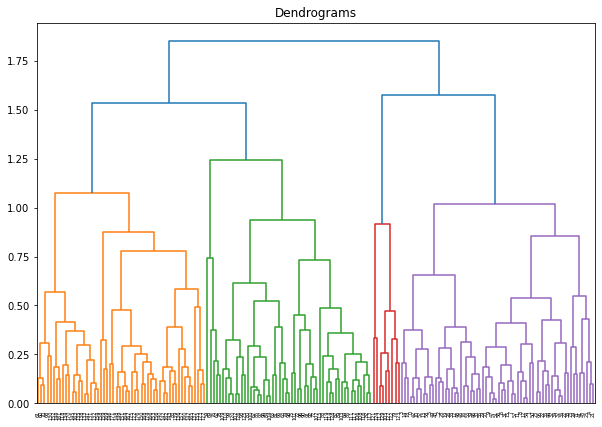

In [71]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(df_pca, method='complete'))

In [72]:
# Creating a loop to iterate through various cluster number and calculate the silhouette score
# Cluster number having highest silhouette score will be chosen to fit the model

from sklearn.metrics import silhouette_score

scores=[]
hc_pca_score=0
hc_pca_cluster=0
i=0

for c in range(3,12):
    
    hc= AgglomerativeClustering(n_clusters=c, affinity = 'euclidean', linkage = 'complete')
    hc_pred = hc.fit_predict(df_pca)
    score= silhouette_score (df_pca, hc_pred, metric='euclidean')
    scores.append(score)
    i=i+1
    if (score>=max(scores)):
        hc_pca_score=round(score,3)
        hc_pca_cluster=c
        
        
print("Maximum silhouette score is {} for optimal number of clusters-{}.".format(hc_pca_score,hc_pca_cluster))
print("Number of iterations:",i)


Maximum silhouette score is 0.445 for optimal number of clusters-4.
Number of iterations: 9


In [73]:
# Fitting the data with 4 clusters
hc_pca= AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
hc_pca_pred = hc_pca.fit_predict(df_pca)
hc_pca_df=df_pca.copy()
hc_pca_df['Clusters']=hc_pca_pred
hc_pca_df.head()

,PC1,PC2,PC3,Clusters
0,-0.706336,-0.253193,0.024093,3
1,-0.484977,-0.008823,-0.280482,3
2,-0.521172,-0.189187,0.196217,3
3,-0.821644,-0.580906,0.081110,3
4,-0.202546,-0.059467,0.300240,3


In [74]:
# Using groupby function to sort by Clusters
hc_pca_df.groupby(['Clusters']).mean()

,PC1,PC2,PC3
Clusters,,,
0,-0.041497,0.387846,-0.052392
1,0.582815,-0.198998,-0.026759
2,0.091377,0.276421,0.469319
3,-0.485404,-0.198350,-0.000034


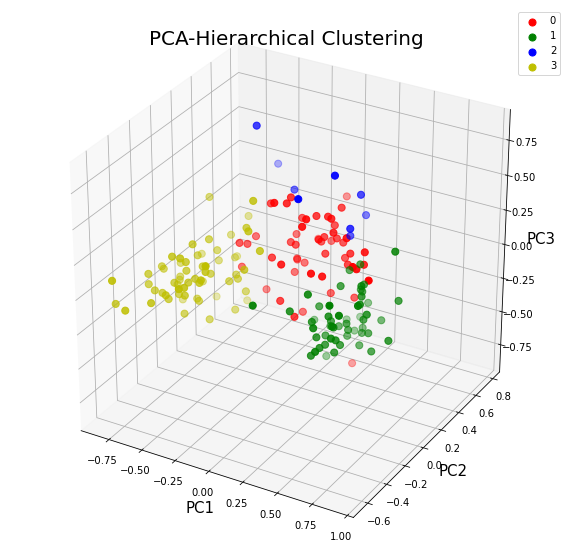

In [75]:
from mpl_toolkits import mplot3d

# Creating figure
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection ="3d")


# Add x, y gridlines
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)

ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)

ax.set_title('PCA-Hierarchical Clustering', fontsize = 20)

clusters = [0,1,2,3]
colors = ['r', 'g', 'b','y']

for cluster, color in zip(clusters,colors):
    
    indicesToKeep = hc_pca_df['Clusters'] == cluster
    ax.scatter(hc_pca_df.loc[indicesToKeep, 'PC1'],hc_pca_df.loc[indicesToKeep, 'PC2'],hc_pca_df.loc[indicesToKeep, 'PC3'], c =color, s = 50)
    
ax.legend(clusters)   

+ PCA followed by hierarchical clustering shows four clusters.The red ,green and yellow clusters are relatively more compact compared to blue cluster(cluster 2).
+ Blue cluster points are rather scattered and not well separated from other cluster points.

## Algorithm used----K-Means Clustering

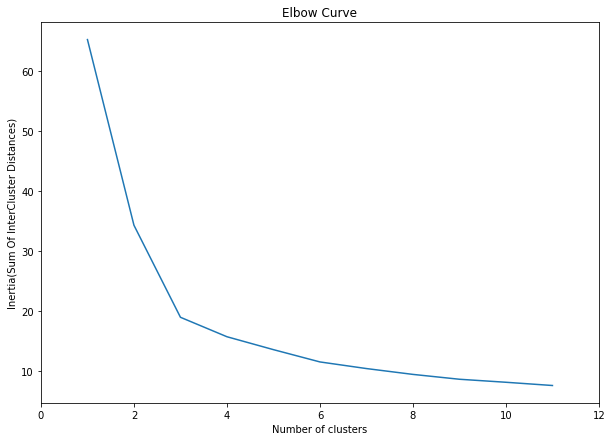

In [76]:
# Finding the optimum number of Clusters using Elbow curve

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,7))    
plt.plot(range(1, 12), wcss)
plt.title('Elbow Curve')
plt.xlim(0,12)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia(Sum Of InterCluster Distances)')
plt.show()

From Elbow curve,it can be seen that optimum number of clusters lie between 2-6

In [77]:
# creating a loop to iterate through possible optimum no of clusters
# calculating their silhouette scores 

scores=[]
km_pca_score=0
km_pca_cluster=0
i=0
for c in range(2,8):
    km= KMeans(n_clusters=c, random_state=0)
    km_pred = km.fit_predict(df_pca)
    score= silhouette_score (df_pca, km_pred, metric='euclidean')
    scores.append(score)
    i=i+1
    if (score>=max(scores)):
        km_pca_score=round(score,3)
        km_pca_cluster=c
        
print("Maximum silhouette score is {} for optimal number of clusters-{}.".format(km_pca_score,km_pca_cluster))
print("Number of iterations:",i)


Maximum silhouette score is 0.478 for optimal number of clusters-3.
Number of iterations: 6


In [78]:
# Fitting the data with 3 clusters
km_pca= KMeans(n_clusters=3, random_state=0)
km_pca_pred = km_pca.fit_predict(df_pca)

km_pca_df=df_pca.copy()
km_pca_df['Clusters']=km_pca_pred
km_pca_df.head()

,PC1,PC2,PC3,Clusters
0,-0.706336,-0.253193,0.024093,1
1,-0.484977,-0.008823,-0.280482,1
2,-0.521172,-0.189187,0.196217,1
3,-0.821644,-0.580906,0.081110,1
4,-0.202546,-0.059467,0.300240,1


In [79]:
# Using groupby function to sort by Clusters
km_pca_df.groupby(['Clusters']).mean()

,PC1,PC2,PC3
Clusters,,,
0,0.017012,0.366126,0.013524
1,-0.485040,-0.177429,-0.004604
2,0.597506,-0.218959,-0.010573


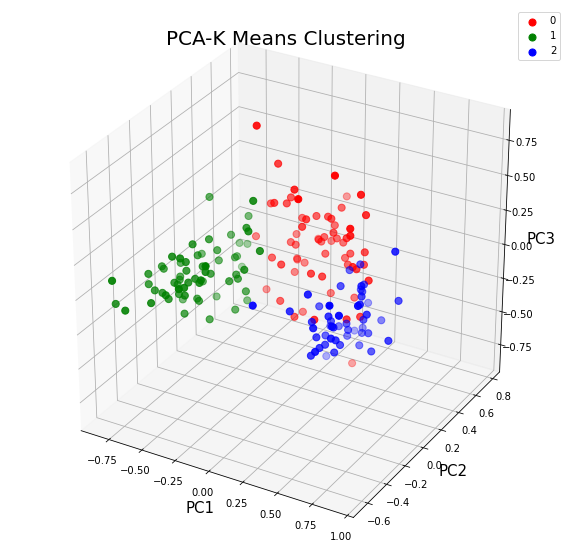

In [80]:
from mpl_toolkits import mplot3d

# Creating figure
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection ="3d")


# Add x, y gridlines
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)

ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)

ax.set_title('PCA-K Means Clustering', fontsize = 20)

clusters = [0,1,2]
colors = ['r', 'g', 'b']

for cluster, color in zip(clusters,colors):
    
    indicesToKeep = km_pca_df['Clusters'] == cluster
    ax.scatter(km_pca_df.loc[indicesToKeep, 'PC1'],km_pca_df.loc[indicesToKeep, 'PC2'],km_pca_df.loc[indicesToKeep, 'PC3'], c =color, s = 50)
    
ax.legend(clusters)   

+ PCA followed by K-Means Clustering gives 3 clusters .
+ All the clusters seem more or less equally dense and well separated compared to hierarchical clustering.

In [81]:
d={'Models':['Hierarchical','K-Means','PCA-Hierarchical','PCA-K-Means'],
   'Clusters predicted':[hc_cluster,km_cluster,hc_pca_cluster,km_pca_cluster],
   'Max Silhouette score':[hc_score,km_score,hc_pca_score,km_pca_score]}
clust=pd.DataFrame(d)

In [82]:
clust

,Models,Clusters predicted,Max Silhouette score
0,Hierarchical,3,0.274
1,K-Means,3,0.301
2,PCA-Hierarchical,4,0.445
3,PCA-K-Means,3,0.478


+ The number of clusters predicted remains same for with and without PCA for K-Means.For hierarchical,the number of predicted cluster is one more when PCA was done compared to without PCA.

+ The above dataframe shows that silhouette scores got increased when clustering was done after PCA was done compared to clustering with whole data.

+ Higher silhouette scores obtained for clustering with PCA shows that clusters are well segmented and well separated when PCA is applied for dimension reduction.